In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from calibrator import Calibrator

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
def load_calibration_lines(input_file='calibration_lines.csv',
                           elements=["Hg", "Ar", "Xe", "CuNeAr", "Kr"],
                           min_wavelength=100,
                           max_wavelength=1000):
    cal_lines = np.loadtxt(input_file, delimiter=',', dtype='U', skiprows=1)
    wave = cal_lines[:, 0].astype('float')
    element = cal_lines[:, 1]
    # Get lines of the requested elements
    lines = wave[np.isin(element, elements)]
    # Get only lines within the requested wavelength
    mask = (lines > min_wavelength) * (lines < max_wavelength)
    return lines[mask]

In [3]:
atlas = load_calibration_lines(
    "calibration_lines.csv", elements=["Xe"], min_wavelength=400, max_wavelength=800)
print(atlas)

spectrum = np.median(fits.open('v_a_20190516_55_1_0_1.fits')[0].data, axis=0)[200:]

peaks, _ = find_peaks(spectrum, distance=10., threshold=20.)

[419.35 438.39 450.1  452.47 458.28 462.43 467.12 473.42 480.7  491.99
 502.83 539.28 582.39 618.24 631.81 666.89 672.8  711.96 728.43 758.47
 764.2 ]


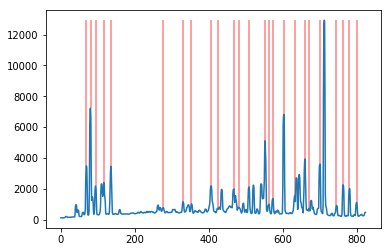

In [4]:
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='red',
              alpha=0.5)

[ 1.70117821e-08 -1.89263437e-05  4.80400419e-01  4.25215877e+02]


[-2.43029748e-08  3.38629378e-05  4.11614655e-01  4.34085398e+02]


[-1.30375233e-08  2.32287361e-05  5.60583465e-01  3.52117584e+02]


[ 2.45324023e-08 -2.66821649e-05  4.82606371e-01  4.25077721e+02]


[-4.88864306e-08  5.10147145e-05  4.08405516e-01  4.34241776e+02]


[ 5.33264275e-09 -9.54203636e-06  4.55611723e-01  4.13976611e+02]


[ 3.00007496e-09 -1.70294832e-05  5.38362799e-01  4.30193419e+02]


[-8.81755816e-09  8.89120869e-06  4.62420307e-01  4.18401033e+02]


[ 2.60062827e-07 -2.85081679e-04  6.09674162e-01  3.91169998e+02]


[-4.84382509e-08  6.45373737e-05  3.90438110e-01  4.35343206e+02]

Peak at: 458.2585854031854 nm
- matched to 458.28 nm
Peak at: 463.52802488709483 nm
Peak at: 470.2273319533489 nm
Peak at: 480.7393168135848 nm
- matched to 480.7 nm
Peak at: 489.8036569921948 nm
Peak at: 557.2337993743672 nm
Peak at: 582.3137559982943 nm
- matched to 582.39 nm
Peak at: 593.1920376690247 nm
Peak at: 618.2595178147475 nm
- matched to 618.24 nm
Peak at: 626.7759917322778 nm
Peak at: 647.608118003132 nm
Peak at: 653.7682520115242 nm
Peak at: 667.0466637698289 nm
- matched to 666.89 nm
Peak at: 687.472541577384 nm
Peak at: 692.7055822559321 nm
Peak at: 697.4659849550433 nm
Peak at: 711.7663686716271 nm
- matched to 711.96 nm
Peak at: 725.6203104389909 nm
Peak at: 739.0281416294475 nm
Peak at: 744.3047166324561 nm
Peak at: 758.7238719737718 nm
- matched to 758.47 nm
Peak at: 764.0219195549606 nm
- matched to 764.2 nm
Peak at: 779.9541900169991 nm
Peak at: 788.6700211871566 nm
Peak at: 796.9191610576173 nm
Pe

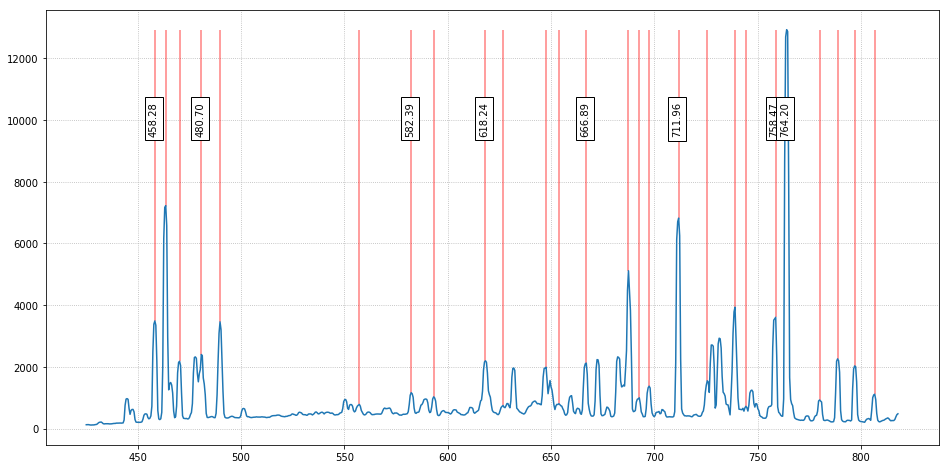

[ 2.45324023e-08 -2.66821649e-05  4.82606371e-01  4.25077721e+02]


In [5]:
c = Calibrator(peaks, atlas)
c.set_fit_constraints(
    min_slope=0.4,
    max_slope=0.6,
    min_intercept=300.,
    max_intercept=500.,
    fit_tolerance=0.5,
    line_fit_thresh=2,
    thresh=1)

best_p = c.fit(top_n=10)
c.plot_fit(spectrum, best_p)
print(best_p)

In [8]:
p = c.match_peaks_to_atlas(best_p)

In [14]:
sprat_lines = np.array((174.5938, 218.6516, 244.9171, 250.1852, 263.4835,
                       272.5811, 283.1109, 297.0666, 313.1024, 338.0731,
                       361.6639, 440.6294, 531.8536, 607.2001, 635.6024,
                       709.1514, 721.5463, 803.5022, 837.9299, 901.1343, 913.2740))
np.polyval(p, sprat_lines)

array([508.6898479 , 529.61052842, 542.05899411, 544.55411281,
       550.85042891, 555.15627837, 560.13860869, 566.74004992,
       574.32336321, 586.12926332, 597.2818698 , 634.6346213 ,
       677.89956168, 713.78802471, 727.36186548, 762.64425459,
       768.6102414 , 808.21203824, 824.92991475, 855.74968382,
       861.68811755])

In [ ]:
np.polyval(p, 419)